**In this notebook we are going to use 3 different learning rate scheduling strategies**

In [37]:
from matplotlib import pyplot as plt 
import keras
import numpy as np
import tensorflow as tf
import math

Load Fashion-MNIST dataset:

In [38]:
# Load Fashion-MNIST dataset 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

x_train = x_train / 255.0
x_test = x_test / 255.0

print('Training set shape: ', x_train.shape)
print('Test set shape: ', x_test.shape)

Training set shape:  (60000, 28, 28, 1)
Test set shape:  (10000, 28, 28, 1)


Define our basic model:

In [39]:
def basic_model():
    x_input = tf.keras.Input([28, 28, 1])
    x = tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same')(x_input)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same')(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(16)(x) # 
    x = tf.keras.layers.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(x_input, x)
    return model

Parameters definition:

In [40]:
initial_learning_rate = 1e-1
batch_size = 32
epochs = 50

**1 - Step Decay**

In [43]:
# we will drop learning rate by half every 10 epochs
def step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 10
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))

schedule = tf.keras.callbacks.LearningRateScheduler(step_decay, verbose=0)

In [44]:
model = basic_model()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=initial_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model.fit(x=x_train, 
                    y=tf.keras.utils.to_categorical(y_train),
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=len(x_train)/batch_size, 
                    verbose=0,
                    callbacks=[schedule],
                    validation_data=(x_test, tf.keras.utils.to_categorical(y_test)))

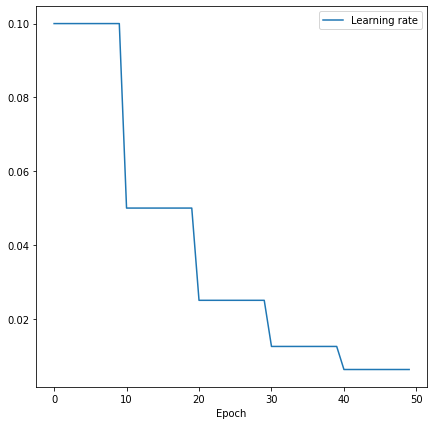

In [45]:
plt.figure(figsize=(7,7))
plt.plot(history1.history['lr'])
plt.xlabel('Epoch')
plt.legend(['Learning rate'], loc='upper right')

**2 - Exponential decay**

In [46]:
def exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)

schedule = tf.keras.callbacks.LearningRateScheduler(exp_decay, verbose=0)

model = basic_model()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=initial_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(x=x_train, 
                    y=tf.keras.utils.to_categorical(y_train),
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=len(x_train)/batch_size, 
                    verbose=0,
                    callbacks=[schedule],
                    validation_data=(x_test, tf.keras.utils.to_categorical(y_test)))

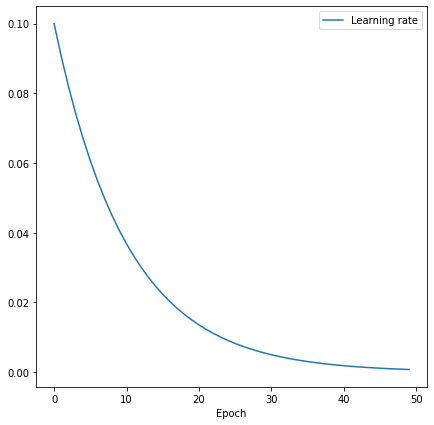

In [47]:
plt.figure(figsize=(7,7))
plt.plot(history2.history['lr'])
plt.xlabel('Epoch')
plt.legend(['Learning rate'], loc='upper right')

**3 - Cosine Annealing**

In [48]:
# Here, let's use the function CosineDecayRestarts
lr_decayed = tf.keras.optimizers.schedules.CosineDecayRestarts(initial_learning_rate, first_decay_steps=10)

schedule = tf.keras.callbacks.LearningRateScheduler(lr_decayed, verbose=0)

model = basic_model()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=initial_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model.fit(x=x_train, 
                    y=tf.keras.utils.to_categorical(y_train),
                    epochs=epochs,
                    batch_size=batch_size,
                    steps_per_epoch=len(x_train)/batch_size, 
                    verbose=0,
                    callbacks=[schedule],
                    validation_data=(x_test, tf.keras.utils.to_categorical(y_test)))

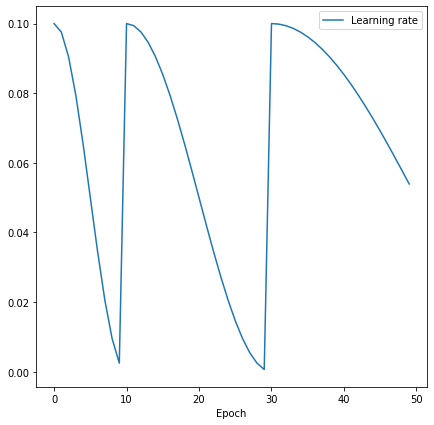

In [49]:
  plt.figure(figsize=(7,7))
  plt.plot(history3.history['lr'])
  plt.xlabel('Epoch')
  plt.legend(['Learning rate'], loc='upper right')

Let visualize the training loss for each one

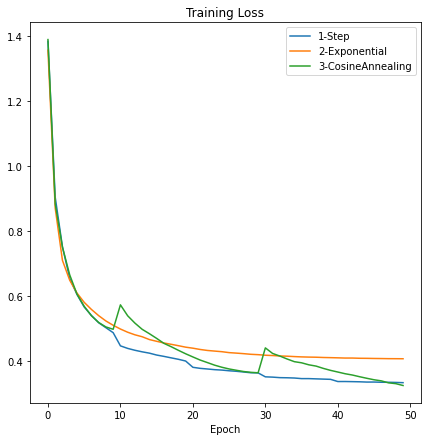

In [54]:
plt.figure(figsize=(7,7))
plt.title('Training Loss')
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.xlabel('Epoch')
plt.legend(['1-Step', '2-Exponential', '3-CosineAnnealing'], loc='upper right')

Now let' see the validation accuracy

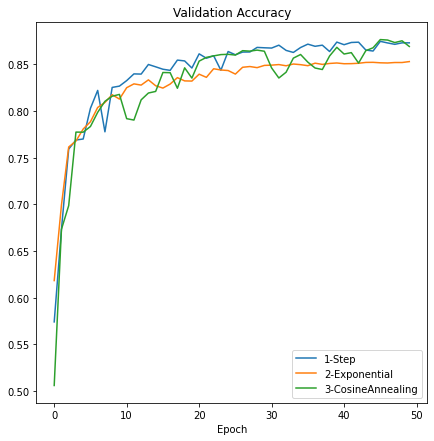

In [58]:
plt.figure(figsize=(7,7))
plt.title('Validation Accuracy')
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.xlabel('Epoch')
plt.legend(['1-Step', '2-Exponential', '3-CosineAnnealing'], loc='lower right')